# Periodic boundary conditions for Linear Schr{\"o}dinger in $2$-D

Study $$(i\partial_t+\nabla^2)q(\vec{x},t)=0$$ on $(t,x)\in [0,L_1]\times[0,L_2]\times[0,T)$ with the initial condition $$u(\vec{x},0)=u_0(\vec{x})$$ and periodic boundary conditions $$\nabla^k u(\vec{L},t)=\nabla^k u(\vec{0},t),~~k=0,1.$$

In [ ]:
Pkg.update()

In [18]:
# dependencies
using PyPlot

In [36]:
# parameters of problem
#Pick L1, L2 commensurate.  That is,
L=4;
rho1=2;
rho2=1;
L1=L/rho1;
L2=L/rho2;
#L2=pi;
# initial condition

# u_0 is the 2D-box function of widths [w1 x w2] centered at (c1,c2)
w1=L1/10;
w2=L2/12;
c1=L1/2;
c2=L2/2;
function u0(x1, x2)
    if (x1.>c1-w1/2) .& (x1.<c1+w1/2) .& (x2.>c2-w2/2) .& (x2.<c2+w2/2)
        return 1
    else
        return 0
    end
end
function u0hat1(la1) 
    if la1.==0
        return w1
    else
        return 2.*exp.(-im*c1*la1).*sin.(w1.*la1./2)./la1
    end
end
function u0hat2(la2) 
    if la2.==0
        return w2
    else
        return 2.*exp.(-im*c2*la2).*sin.(w2.*la2./2)./la2
    end
end
u0hat(la1,la2) = u0hat1.(la1)*transpose(u0hat2.(la2))
## note that we are using a separable q0hat.  This is important for code speed up.

u0hat (generic function with 1 method)

In [37]:
# parameters of evaluation
jmax=10000; # we will sum over 2*jmax terms
js=collect(-jmax:jmax);
ks=js;

la1(j) = 2*j*pi/L1;
la2(j) = 2*j*pi/L2;

x1part(x1,t)=transpose(exp.(-im*t*(la1(js).^2)).*u0hat1.(la1(js)))*exp.(im*la1(js)*x1');
x2part(x2,t)=transpose(exp.(-im*t*(la2(ks).^2)).*u0hat2.(la2(ks)))*exp.(im*la2(ks)*x2');
u(x1,x2,t)=1/(L1*L2)*transpose(x1part(x1,t))*x2part(x2,t);

In [38]:
##parameters for plotting/ movies
x1step = L1/ 1000 #how fine a mesh to use for plotting
X1=collect(0:x1step:L1)
x2step = L2/ 1000 #how fine a mesh to use for plotting
X2=collect(0:x2step:L2)

tstep=.05;
tmin=0;
tmax=4.5;
ts=collect(tmin:tstep:tmax)

#create a p/q that matches the times selected above
eps=.1/L;
ps=Array{Int64}(length(ts));
qs=Array{Int64}(length(ts));
maxq=10;
maxp=ceil((4*pi*tmax*maxq)/L^2);
for j in 1:length(ts)
    t=ts[j]
    for q in 1:maxq, p in 0:maxp
        ps[j]=p
        qs[j]=q
        if 4*pi*t/L^2-eps<p/q<4*pi*t/L^2+eps
            break
        elseif j==1
            ps[j]=0
            qs[j]=1/eps
        else
            ps[j]=ps[j-1]
            qs[j]=qs[j-1]
        end
    end
end
#the following should be not too big relative to length(ts).  If not, increase maxv.
sum(1-(abs.(L^2.*ps./(4*pi*qs)-ts).<eps))

28

In [39]:
# evaluate at one time
p = 2;
q = 3;
T = (p/q)*L^2/(4*pi);

@time U = u(X1,X2,T)
@time U0 = u0.(X1,X2);

  5.368942 seconds (396.50 k allocations: 1.224 GiB, 8.60% gc time)
  0.066114 seconds (17.94 k allocations: 596.916 KiB)


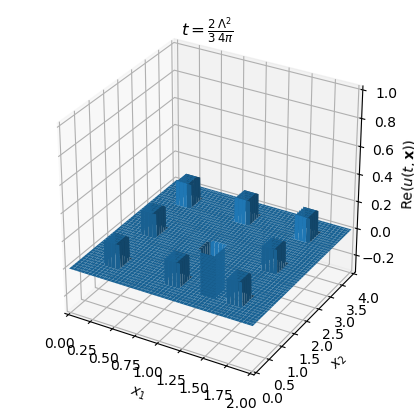

PyObject Text(0.5,0.92,'$t=\\frac{2}{3} \\frac{\\Lambda^2}{4\\pi}$')

In [40]:
# plot at the time given above
using3D()
fig=figure("LS_2D_rational_time",figsize=(5,5))
ax=axes(xlim=(0,L1),ylim=(0,L2),zlim=(-.3,1),projection="3d")
plot_surface(X1,X2,real.(U))
xlabel(L"x_1")
ylabel(L"x_2")
zlabel(L"\operatorname{Re}(u(t,\mathbf{x}))")
mytitle=latexstring("t=\\frac{$p}{$q} \\frac{\\Lambda^2}{4\\pi}")
title(mytitle)
#tight_layout(w_pad=-1, h_pad=10, pad=0)
#savefig("test.pdf")

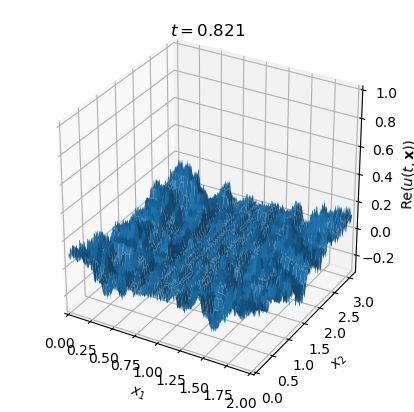

  4.803441 seconds (360.26 k allocations: 1.223 GiB, 8.88% gc time)


PyObject Text(0.5,0.92,'$t=0.821$')

In [30]:
T = round((p/q)*L^2/13,3);
@time U = u(X1,X2,T)

# plot at the time given above
fig=figure("LS_2D_irrational_time",figsize=(5,5))
ax=axes(xlim=(0,L1),ylim=(0,L2),zlim=(-.3,1),projection="3d")
plot_surface(X1,X2,real.(U))
xlabel(L"x_1")
ylabel(L"x_2")
zlabel(L"\operatorname{Re}(u(t,\mathbf{x}))")
mytitle=latexstring("t=$T")
title(mytitle)
#tight_layout(w_pad=-1, h_pad=10, pad=0)
#savefig("test.pdf")

In [ ]:
# plot at the time given above
fig=figure("LS_2D_irrational_time",figsize=(5,5))
ax=axes(xlim=(0,L1),ylim=(0,L2),zlim=(-.3,1),projection="3d")
plot_surface(X1,X2,U0)
xlabel(L"x_1")
ylabel(L"x_2")
zlabel(L"\operatorname{Re}(u(t,\mathbf{x}))")
mytitle=latexstring("t=$T")
title(mytitle)
#tight_layout(w_pad=-1, h_pad=10, pad=0)
#savefig("test.pdf")

In [ ]:
# plot at the time given above
fig=figure("LS_2D_rational_time",figsize=(5,5))
ax=axes(xlim=(0,L1),ylim=(0,L2),zlim=(-.3,1),projection="3d")
plot_surface(X1,X2,imag.(U))
xlabel(L"x_1")
ylabel(L"x_2")
zlabel(L"\operatorname{Im}(u(t,\mathbf{x}))")
mytitle=latexstring("t=\\frac{$p}{$q} \\frac{\\Lambda^2}{4\\pi}")
title(mytitle)
#tight_layout(w_pad=-1, h_pad=10, pad=0)
#savefig("test.pdf")

In [41]:
##MOVIE IN TIME (rational multiples)
for j=1:length(ts)
    fig=figure("LS_2D_rational_time",figsize=(5,5))
    ax=axes(xlim=(0,L1),ylim=(0,L2),zlim=(-.3,1),projection="3d")
    p=ps[j];
    q=qs[j];
    T = (p/q)*L^2/(4*pi);
    #T = (p/q)*pi^2/(4*pi);
    U = u(X1,X2,T)
    plot_surface(X1,X2,real.(U))
    mytitle=latexstring("t=\\frac{$p}{$q} \\frac{\\Lambda^2}{4\\pi}")
    #mytitle=latexstring("t=\\frac{$p}{$q} \\frac{\\pi^2}{4\\pi}")
    title(mytitle)
    xlabel(L"x_1")
    ylabel(L"x_2")
    zlabel(L"\operatorname{Re}(u(t,\mathbf{x}))")
    tight_layout(w_pad=-1, h_pad=10, pad=0)
    savefig("LS_2D_r_$j.pdf")
    clf()
end

In [32]:
##MOVIE IN TIME (irrational multiples)
for j=1:length(ts)
    fig=figure("LS_2D_irrational_time",figsize=(5,5))
    ax=axes(xlim=(0,L1),ylim=(0,L2),zlim=(-.3,1),projection="3d")
    T = ts[j];
    U = u(X1,X2,T)
    plot_surface(X1,X2,real.(U))
    mytitle=latexstring("t=$T");
    title(mytitle)
    xlabel(L"x_1")
    ylabel(L"x_2")
    zlabel(L"\operatorname{Re}(u(t,\mathbf{x}))")
    tight_layout(w_pad=-1, h_pad=10, pad=0)
    savefig("LS_2D_irr_$j.pdf")
    clf()
end